# 얼굴 영역 자르기
---

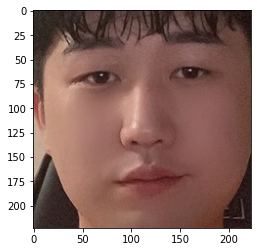

In [16]:
import face_recognition
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm # iteratable 객체의 진행률 표시해주는 라이브러리
%matplotlib inline

# 이미지 파일에서 얼굴 영역을 가져오는 함수
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    # 얼굴영역 찾기 실패시 빈 array 전달
    if len(face_locations) == 0:
        return np.array([], dtype=np.float64)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    
    return cropped_face

img_path = os.getenv('HOME') + '/aiffel/01_Exploration/celeb_lookalike_finder_img/이지수1.jpg'

cropped_face = get_cropped_face(img_path)
plt.imshow(cropped_face)

# 얼굴 자른 영역 변형 및 저장(Pillow)
---

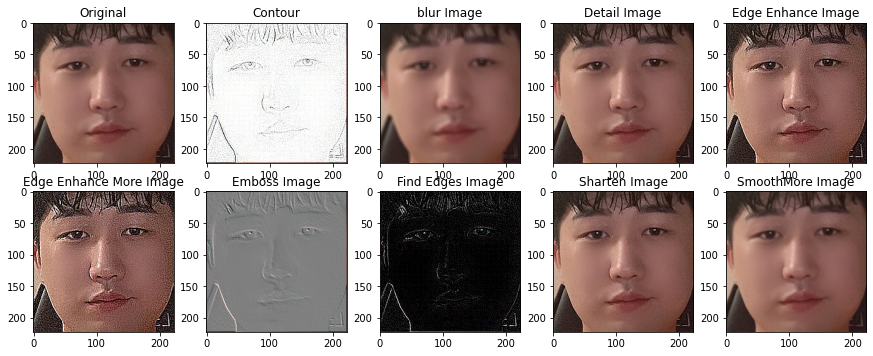

In [78]:
from PIL import Image, ImageFilter

cropped_Image_path = os.getenv('HOME') + '/aiffel/01_Exploration/Cropped/'
pillow_image = Image.fromarray(cropped_face)

plt.figure(figsize=(15,15))

plt.subplot(551)
plt.title('Original')
plt.imshow(pillow_image)
# 이미지 저장
pillow_image.save(cropped_Image_path + 'Original.jpg')

plt.subplot(552)
ImgContour = pillow_image.filter(ImageFilter.CONTOUR)
plt.title('Contour')
plt.imshow(ImgContour)
ImgContour.save(cropped_Image_path + 'Contour.jpg')

plt.subplot(553)
ImgBlur = pillow_image.filter(ImageFilter.BLUR)
plt.title('blur Image')
plt.imshow(ImgBlur)
ImgBlur.save(cropped_Image_path + 'blur.jpg')

plt.subplot(554)
ImgDetail = pillow_image.filter(ImageFilter.DETAIL)
plt.title('Detail Image')
plt.imshow(ImgDetail)
ImgDetail.save(cropped_Image_path + 'Detail.jpg')

plt.subplot(555)
ImgEdgeEnhance = pillow_image.filter(ImageFilter.EDGE_ENHANCE)
plt.title('Edge Enhance Image')
plt.imshow(ImgEdgeEnhance)
ImgEdgeEnhance.save(cropped_Image_path + 'EdgeEnhance.jpg')

plt.subplot(556)
ImgEdgeEnhanceMore = pillow_image.filter(ImageFilter.EDGE_ENHANCE_MORE)
plt.title('Edge Enhance More Image')
plt.imshow(ImgEdgeEnhanceMore)
ImgEdgeEnhanceMore.save(cropped_Image_path + 'EdgeEnhanceMore.jpg')

plt.subplot(557)
ImgEmboss = pillow_image.filter(ImageFilter.EMBOSS)
plt.title('Emboss Image')
plt.imshow(ImgEmboss)
ImgEmboss.save(cropped_Image_path + 'Emboss.jpg')

plt.subplot(558)
ImgFindEdnges = pillow_image.filter(ImageFilter.FIND_EDGES)
plt.title('Find Edges Image')
plt.imshow(ImgFindEdnges)
ImgFindEdnges.save(cropped_Image_path + 'FindEdges.jpg')

plt.subplot(559)
ImgSharp = pillow_image.filter(ImageFilter.SHARPEN)
plt.title('Sharten Image')
plt.imshow(ImgSharp)
ImgSharp.save(cropped_Image_path + 'Sharp.jpg')

plt.subplot(5,5,10)
ImgSmoothMore = pillow_image.filter(ImageFilter.SMOOTH_MORE)
plt.title('SmoothMore Image')
plt.imshow(ImgSmoothMore)
ImgSmoothMore.save(cropped_Image_path + 'SmoothMore.jpg')

# 얼굴 영역의 임베딩 추출하기
---

In [19]:
dir_path = os.getenv('HOME') + '/aiffel/01_Exploration/celeb_lookalike_finder_img'
file_list = os.listdir(dir_path)

#print('file_list:{}'.format(file_list))
#print(123, file_list)
#img_file = os.path.join(img_path, 'js6.png' )
face = get_cropped_face(img_path) # 얼굴 영역을 구하는 함수

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를  구하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in tqdm(file_list): #  tqdm() 해당 이터레이터가 진행률 표현
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
        #얼굴 영역 face가 제대로 detect 되지 않으면 len(embedding)==0인 경우가 발생하므로
        #os.path.splitext(file)[0]에는 이미자 파일명에서 확장자를 제거한 이름이 담긴다.
            embedding_dict[os.path.splitext(file)[0]]=embedding[0]      
    return embedding_dict

embedding_dict = get_face_embedding_dict(dir_path)

100%|██████████| 80/80 [00:51<00:00,  1.55it/s]


In [20]:
#임베딩 벡터 확인
embedding_dict['이지수1']

array([-0.04013832,  0.05536485,  0.0137252 , -0.06968877, -0.16248865,
        0.03109359, -0.07392558, -0.07437464,  0.06966538, -0.13621666,
        0.17202906, -0.04831275, -0.23211651, -0.06267111, -0.06575775,
        0.19321686, -0.13550264, -0.15633121, -0.04557608,  0.04944452,
        0.0654694 ,  0.04367015, -0.00051971,  0.01695857, -0.11215013,
       -0.30102551, -0.06965795, -0.03643895, -0.00335636, -0.02847002,
       -0.08360026,  0.06514251, -0.17054518, -0.02384028,  0.03788214,
        0.10042436, -0.03484641, -0.06440607,  0.12713511,  0.036629  ,
       -0.26898444,  0.04577943,  0.02023353,  0.23666386,  0.16981848,
        0.02952762,  0.05209891, -0.12812394,  0.09769905, -0.21654172,
        0.06621873,  0.13650469,  0.07837506,  0.05668652, -0.02066486,
       -0.11909358,  0.04165804,  0.14165604, -0.07259825,  0.0310952 ,
        0.1179802 , -0.0278189 , -0.00463533, -0.13625641,  0.2038151 ,
        0.01891724, -0.13396128, -0.16142428,  0.1345306 , -0.12

# 모은 연예인들과 비교하기
---

In [79]:
# 두 이미지(사람 이름) 사이의 임베딩 벡터 거리를 구하는 함수
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

def get_nearest_face(name, top=5): 
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    resultList = []
    
    print('-----------------------------------------------------')
    for i in range(top+1):
        if i ==0: # 첫번쨰로 나오는 이름은 자기 자신일 것이므로 제외시킨다.
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            resultList.append(sorted_faces[i][0])

    return resultList
    
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1  

get_nearest_face('이지수1')

-----------------------------------------------------
순위 1 : 이름(이지수2), 거리(0.27948218213781373)
순위 2 : 이름(b1a4진영), 거리(0.38075186530090116)
순위 3 : 이름(공효진), 거리(0.3909695126966702)
순위 4 : 이름(마동석), 거리(0.4152498574424279)
순위 5 : 이름(디오), 거리(0.4217058352509953)


['이지수2', 'b1a4진영', '공효진', '마동석', '디오']

# 다양한 재미있는 시각화 시도해보기
1. name의 TextArea 에 기존 이미지를 모아둔 폴더의 이미지 명을 쓴다.
2. 닮은꼴 찾기 버튼을 누른다.
3. 1위부터 5위까지 닮은꼴(임베딩 벡터 거리가 가까운) 연예인의 이름이 나온다.
4. 순위에 해당 연예인 이름으로 이미지를 open 해 하단에 배치하여 보여준다.
---

Text(value='찾고 싶은 연예인을 입력해주세요.', description='name')

Button(description='닮은꼴 찾기', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

<Figure size 360x360 with 0 Axes>

-----------------------------------------------------
순위 1 : 이름(이지수2), 거리(0.27948218213781373)
순위 2 : 이름(b1a4진영), 거리(0.38075186530090116)
순위 3 : 이름(공효진), 거리(0.3909695126966702)
순위 4 : 이름(마동석), 거리(0.4152498574424279)
순위 5 : 이름(디오), 거리(0.4217058352509953)


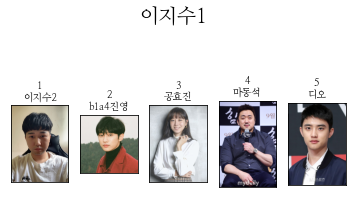

-----------------------------------------------------
순위 1 : 이름(이지수1), 거리(0.27948218213781373)
순위 2 : 이름(공효진), 거리(0.3719791771917868)
순위 3 : 이름(마동석), 거리(0.42585587301743644)
순위 4 : 이름(개리), 거리(0.4295452917774771)
순위 5 : 이름(김현수), 거리(0.43393334863747074)


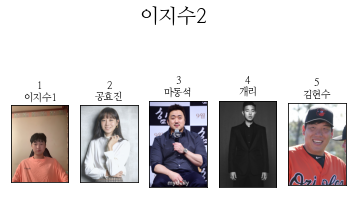

-----------------------------------------------------
순위 1 : 이름(노홍철), 거리(0.45806415274040835)
순위 2 : 이름(고창석), 거리(0.469764988401674)
순위 3 : 이름(김상호), 거리(0.47024553344198095)
순위 4 : 이름(김영삼), 거리(0.48868487051535486)
순위 5 : 이름(강동원), 거리(0.49482228805159884)


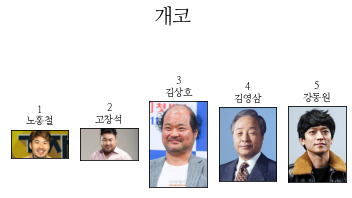

-----------------------------------------------------
순위 1 : 이름(류승룡), 거리(0.4795960076625507)
순위 2 : 이름(노홍철), 거리(0.5038679446955339)
순위 3 : 이름(김경진), 거리(0.5061207034485881)
순위 4 : 이름(돈스파이크), 거리(0.5176436021206976)
순위 5 : 이름(박명수), 거리(0.5186638480500617)


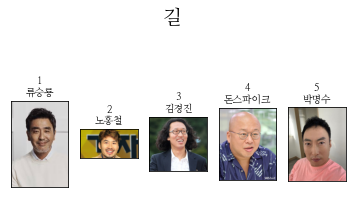

-----------------------------------------------------
순위 1 : 이름(김영삼), 거리(0.43620974947488483)
순위 2 : 이름(류승룡), 거리(0.45973609704761365)
순위 3 : 이름(곽도원), 거리(0.4709298125329957)
순위 4 : 이름(노홍철), 거리(0.5203143097515304)
순위 5 : 이름(노무현), 거리(0.532886874587219)


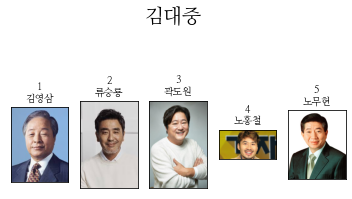

-----------------------------------------------------
순위 1 : 이름(레인보우재경), 거리(0.42132108369612536)
순위 2 : 이름(김고은), 거리(0.43845951211158946)
순위 3 : 이름(러블리즈지수), 거리(0.43883859897885236)
순위 4 : 이름(리아), 거리(0.44293286833036966)
순위 5 : 이름(레드벨벳웬디), 거리(0.4479956096153465)


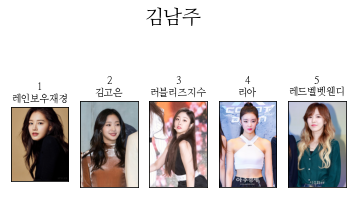

-----------------------------------------------------
순위 1 : 이름(개리), 거리(0.45071597357650384)
순위 2 : 이름(이지수2), 거리(0.46224411816634736)
순위 3 : 이름(김민재), 거리(0.4911980512421694)
순위 4 : 이름(이지수1), 거리(0.49968249073830695)
순위 5 : 이름(마동석), 거리(0.5039554618297126)


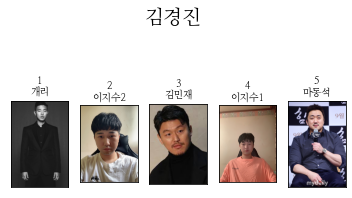

-----------------------------------------------------
순위 1 : 이름(박건우), 거리(0.44629318021105313)
순위 2 : 이름(대도서관), 거리(0.4557804168322389)
순위 3 : 이름(김민재), 거리(0.4741545207294816)
순위 4 : 이름(곽도원), 거리(0.47691399309611004)
순위 5 : 이름(목진화), 거리(0.4883625847194476)


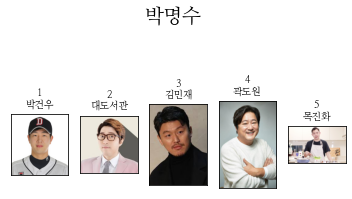

-----------------------------------------------------
순위 1 : 이름(로저 무어), 거리(0.7019116860300015)
순위 2 : 이름(다니엘 크레이그), 거리(0.7053294793242082)
순위 3 : 이름(clinton), 거리(0.7692546525664671)
순위 4 : 이름(로다주), 거리(0.8096639257650393)
순위 5 : 이름(biden), 거리(0.8161983684829155)


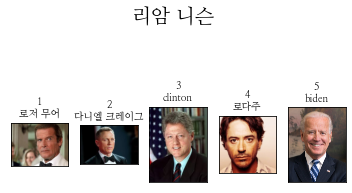

-----------------------------------------------------
순위 1 : 이름(강미나), 거리(0.3768493960854499)
순위 2 : 이름(레인보우재경), 거리(0.3992538901951995)
순위 3 : 이름(리아), 거리(0.4159078092426065)
순위 4 : 이름(류진), 거리(0.43882806742358765)
순위 5 : 이름(김남주), 거리(0.43883859897885236)


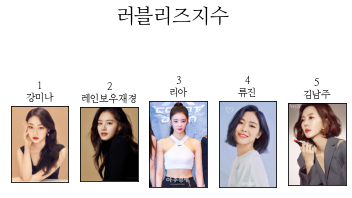

In [82]:
from ipywidgets import widgets
from IPython.display import Javascript, display
import matplotlib.font_manager as fm


# plot title 표시 시 한글 깨짐 현상으로 인해 사용
#print ('버전: ', matplotlib.__version__)
#print ('설치 위치: ', matplotlib.__file__)
#print ('설정 위치: ', matplotlib.get_configdir())
#print ('캐시 위치: ', matplotlib.get_cachedir())
#print ('설정파일 위치: ', matplotlib.matplotlib_fname())

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
#[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(fname=path, size=10)


plt.figure(figsize=(5,5))
img_path_visual = os.getenv('HOME') + '/aiffel/01_Exploration/celeb_lookalike_finder_img/'

event_type_ui = widgets.Text('찾고 싶은 연예인을 입력해주세요.', description='name')
button = widgets.Button(description='닮은꼴 찾기') 
output = widgets.Output(layout={'border': '1px solid black'}) 

#@output.capture(clear_output=True) # 매번 클릭시, 출력창을 비우기 위해(없으면 계속 누적해서 출력됨)
def on_click_callback(b: widgets.Button) -> None: 
    resultList =  get_nearest_face(event_type_ui.value)
    
    for i, v in enumerate(resultList):
        img = Image.open(img_path_visual+v+'.jpg')
        plt.suptitle(f'{event_type_ui.value}',fontsize=20, fontproperties=fontprop)
        plt.subplot(1,5,i+1)
        
        # 눈금 없애기 위한 작업
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        
        plt.title(f'{i+1}\n{v}', fontproperties=fontprop)
        plt.imshow(img)
    # 이미지 저장

button.on_click(on_click_callback)
display(event_type_ui)
display(button)
display(output)

# 회고
---

- 이번 프로젝트에서 **어려웠던 점,**        
    - 시각화가 어려웠다. 예제에서 보여준 시각화만 해봤을 뿐 자유 의지(?)로 해본적이 없어서 어려웠다.

- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.           
    - matplotlib 에서 축이나 타이틀이 Default 한글로 안되서 한글로 하는법
    - ipywidgets 사용법  
    - FaceNet 의 개념이 완벽하지 않고 모호하다.

- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.
    - 다양하고 재미있는 결과 시각화를 시도 시, 노드에서 제안했던 tkinter 라이브러리를 사용하려 하였지만 Notebook에서는 사용이 불가하다는 글을 찾아 대체할 수 있는 ipywidgets 라이브러리를 사용하여 시각화를 진행하였다.
    - Pillow 의 ImageFilter 를 사용하여 이미지를 여러 방법으로 변형해보고 저장했다.
    - 나와 임베딩 거리 0.5 이내로 닮은 연예인을 찾아 냈다.
    - 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.
- **자기 다짐**
     -  해당 프로젝트를 닮은꼴 찾기나 시각화 부분에서 좀 더 고도화 할 수 있었지만 못해서 아쉽다.
     -  기회가 있다면 좀 더 고도화 작업을 진행해보자.